# Frequency Domain
SPI2 Basics on Image processing

Ecole Centrale Nantes

Diana Mateus

Participant: Ke GUO

## 0. Preparation 

### 0.1 Import the required modules


In [1]:
from scipy import ndimage
import matplotlib.pyplot as plt
import numpy as np
import os
import skimage.io as io
from skimage.transform import resize

### 0.2 Define the main image folder
Make sure the subsequent parts of this notebook refer to this definition IMDIR. **When evaluating your notebook I should only need to change the path here** to run the entire notebook.

In [2]:
IMDIR = "./images/"
print(os.listdir(IMDIR))



['.DS_Store', 'Fourier', 'Frequency', 'jpeg', 'PhaseMag']


### 0.2 Read and display the images
Check that you can read and display all the provided images. Do not include this cell, the code nor its ouput in the final report

E:\ananconda\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


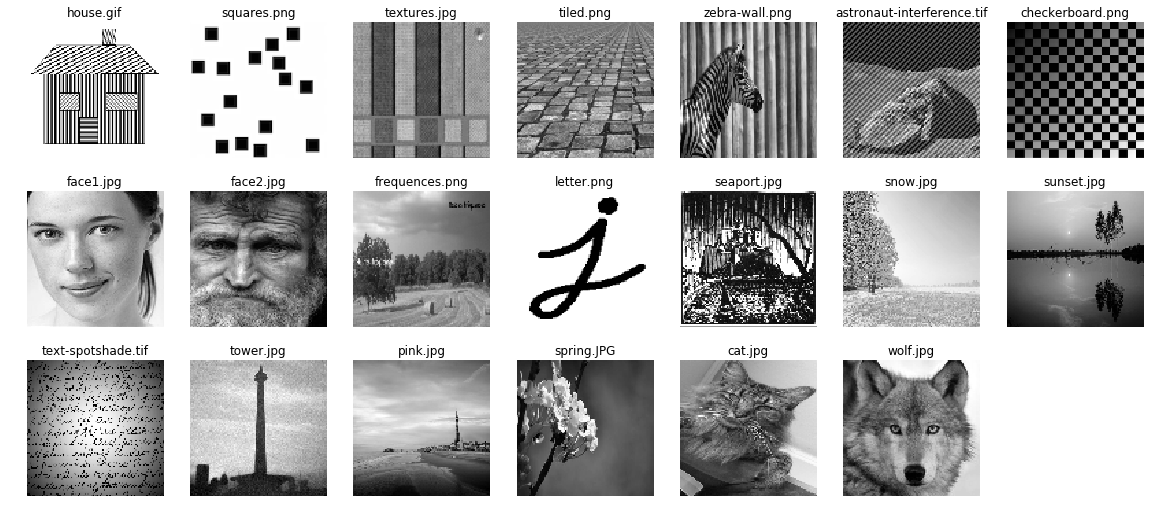

In [3]:
width=20
height=15
plt.rcParams['figure.figsize'] = [width, height]
            
fig=plt.figure()

im_counter = 1
for root, dirnames, filenames in os.walk(IMDIR):
    for filename in filenames:
        f = os.path.join(root, filename)
        
        #filter only image files with the following format
        if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):
            
            # print the paths to current filename if nothing is being found
            # print(filename)
            
            # read the image 
            im = io.imread(f,as_gray=True)
            im = resize(im,(100,100),mode='constant')

            # display it
            plt.subplot(5,7,im_counter)
            plt.imshow(im, cmap='gray')
            plt.title(filename)
            plt.axis('off')
            im_counter +=1 


plt.show()



## 1. The Discrete Fourier Transform




In this exercise we will compute and visualize a DFT using numpy's fft functions:
- ```np.fft.fft2```: computes the two-dimensional FFT of an image.
- ```np.fft.fftshift```: center the frecuencies in the middle of the image
- ```np.fft.ifftshift```: reverses the centering
- ```np.fft.ifft2```: inverse fourier transform
- ```np.real```: takes the real components of a complex number
- ```np.abs```: recovers the magnitude of a complex number
- ```np.angle```: recovers the phase of a complex number 
- ```np.log```: computes the logarithm

The following code uses the above functions applied to the provided images, and shows

**a)** the original image 

**b)** the magnitude of its fft (scaled logarithmically)

**c)** the magnitude of its **centered(shifted)** Discrete Fourier transform fft (scaled logarithmically)

**c)** the inverse fft of the above transformed image (all the steps shouls be reversed)

**d) For each image explain how to interpret the FFT images**


# IMAGES IN FOURIER FOLDER

./images/Fourier\house.gif
(256, 256)
(256, 256)


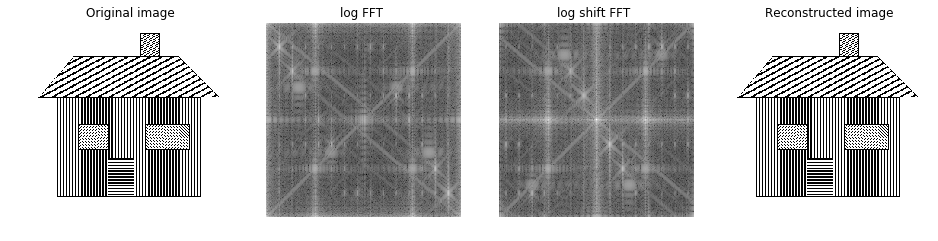

./images/Fourier\squares.png
(141, 142)
(141, 142)


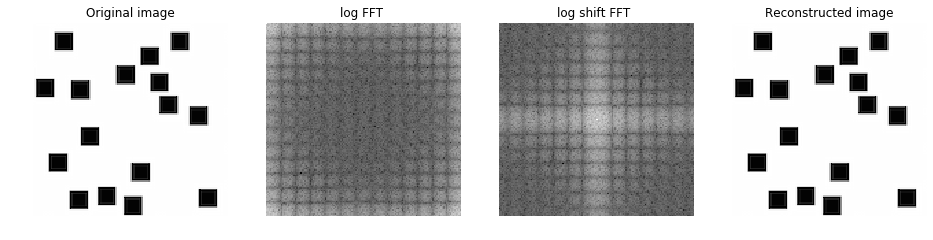

./images/Fourier\textures.jpg
(165, 220)
(165, 220)


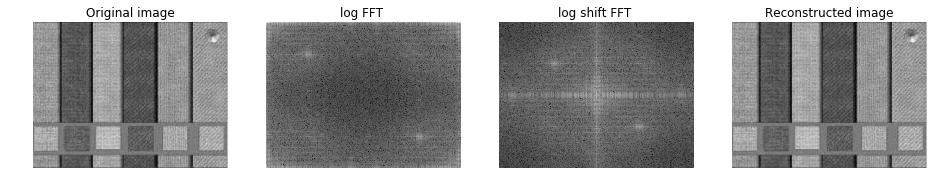

./images/Fourier\tiled.png
(359, 320)
(359, 320)


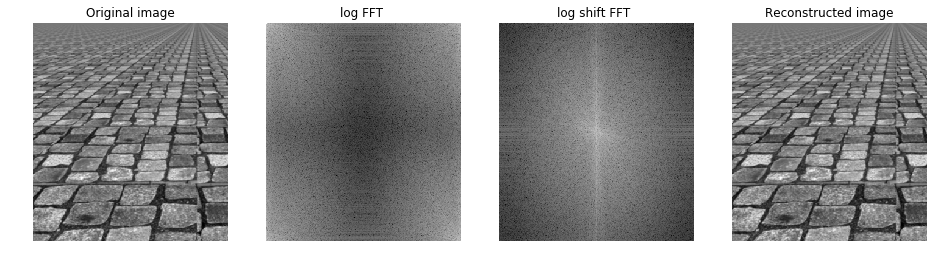

./images/Fourier\zebra-wall.png
(346, 518)
(346, 518)


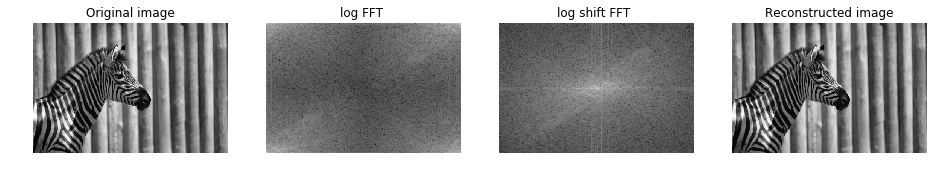

./images/Frequency\astronaut-interference.tif
(824, 1000)
(824, 1000)


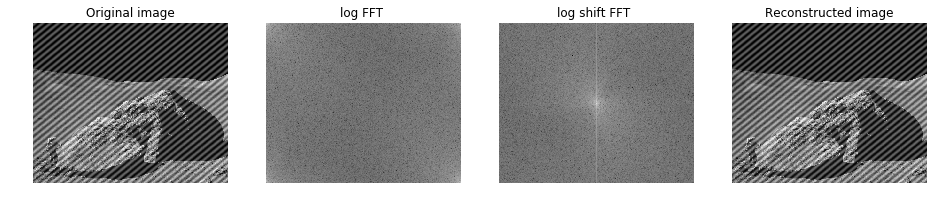

./images/Frequency\checkerboard.png
(286, 285)
(286, 285)


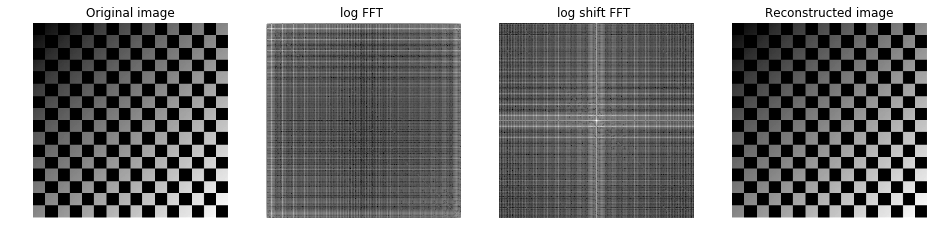

./images/Frequency\face1.jpg
(267, 247)
(267, 247)


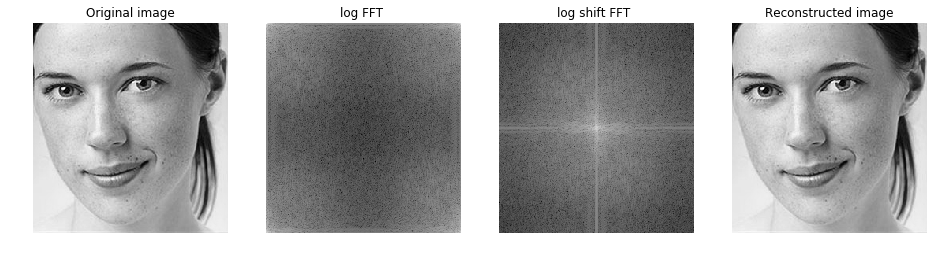

./images/Frequency\face2.jpg
(300, 227)
(300, 227)


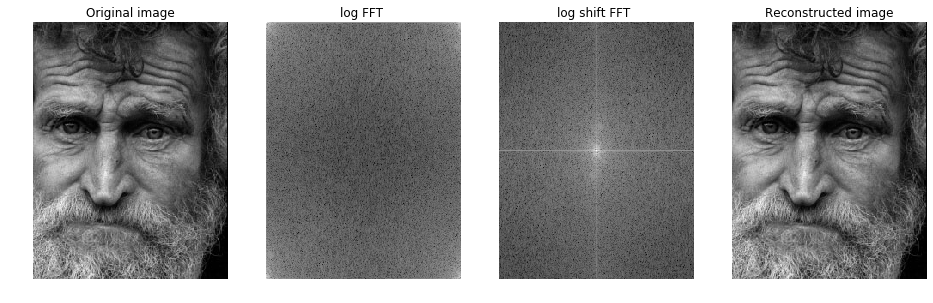

./images/Frequency\frequences.png
(308, 600)
(308, 600)


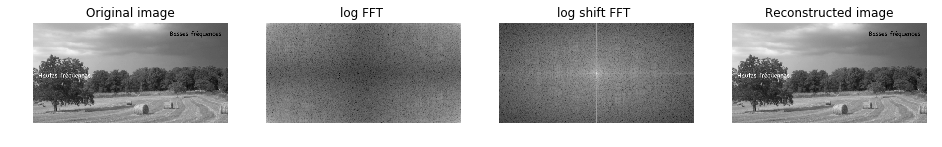

./images/Frequency\letter.png
(150, 112)
(150, 112)


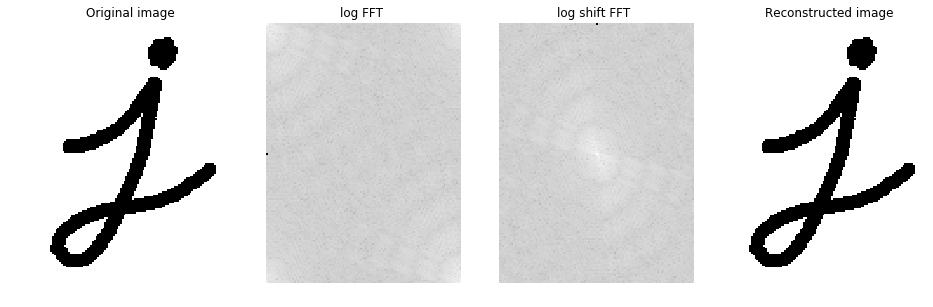

./images/Frequency\seaport.jpg
(820, 1032)
(820, 1032)


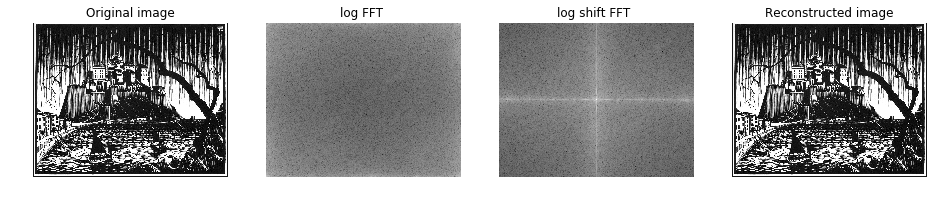

./images/Frequency\snow.jpg
(1272, 1920)
(1272, 1920)


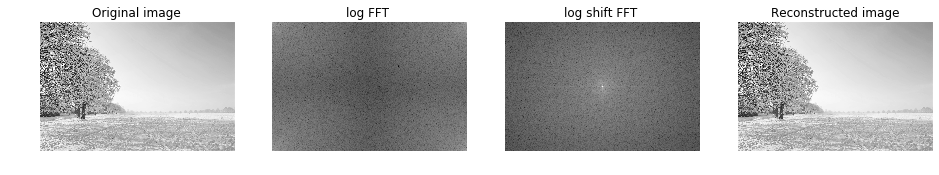

./images/Frequency\sunset.jpg
(341, 512)
(341, 512)


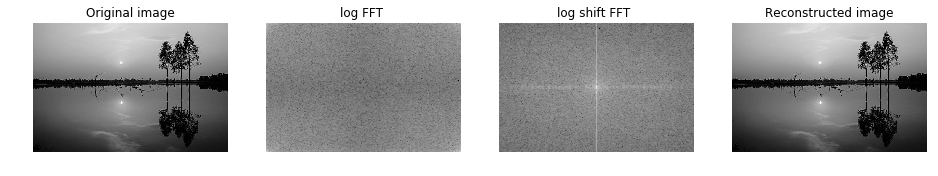

./images/Frequency\text-spotshade.tif
(686, 772)
(686, 772)


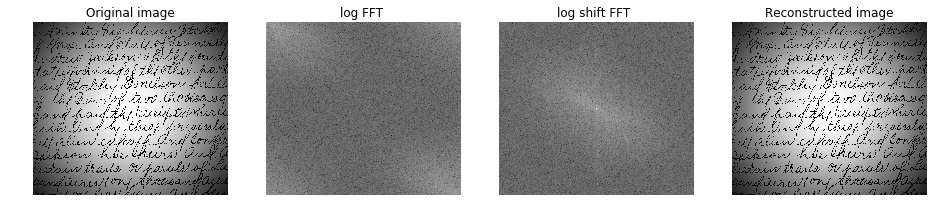

./images/Frequency\tower.jpg
(370, 371)
(370, 371)


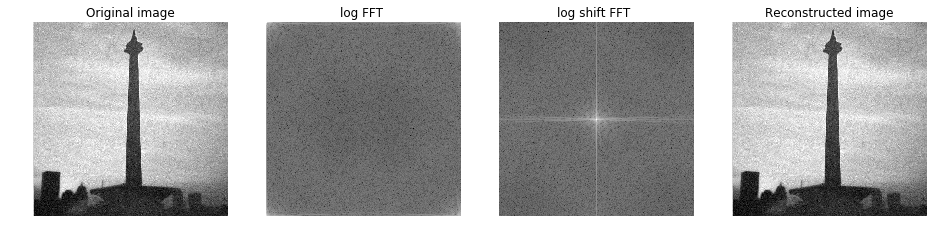

./images/jpeg\pink.jpg
(427, 640)
(427, 640)


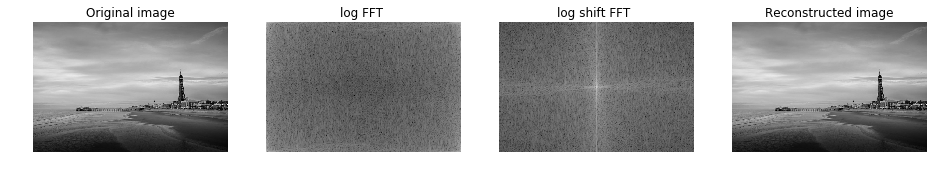

./images/jpeg\spring.JPG
(340, 512)
(340, 512)


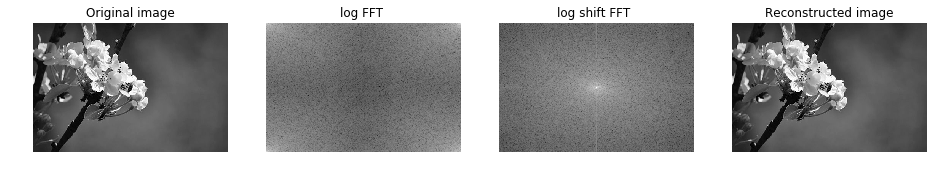

./images/PhaseMag\cat.jpg
(773, 500)
(773, 500)


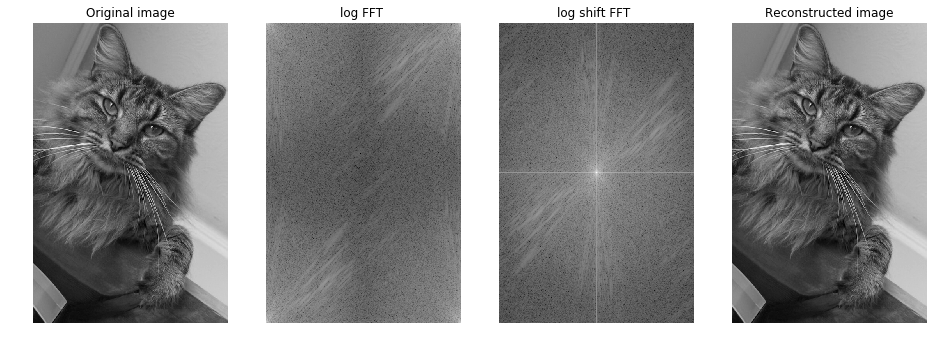

./images/PhaseMag\wolf.jpg
(274, 273)
(274, 273)


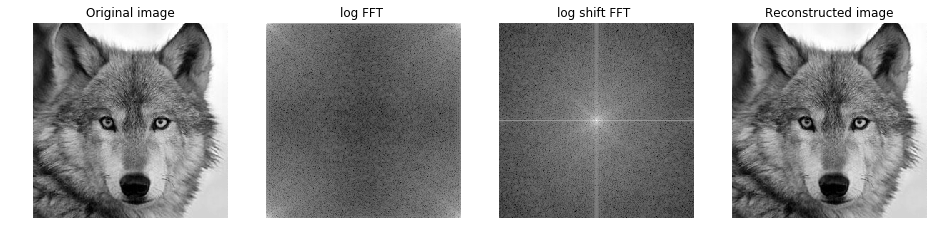

In [4]:
SUBDIR = IMDIR 


for root, dirnames, filenames in os.walk(SUBDIR):
    # print path to all filenames.
    for filename in filenames:
        f = os.path.join(root, filename)
        if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):
            print(f)
            im = io.imread(f,as_gray=True)
            #im = resize(im,(100,100),mode='constant') #Uncomment this line if it is too slow
    
            
            # TO EXPLAIN BY STUDENTS
            im_fft = np.fft.fft2(im)
            im_fft_shifted=np.fft.fftshift(im_fft)
            print(np.shape(im_fft_shifted))
            im_fft_shifted=im_fft_shifted[:,:]
            print(np.shape(im_fft_shifted))
            im_recon = np.real(np.fft.ifft2(np.fft.ifftshift(im_fft_shifted)))
            # END TO EXPLAIN BY STUDENTS
            
            
            fig=plt.figure(figsize=(16, 18))

            plt.subplot(141)
            plt.title('Original image')
            plt.imshow(im)
            plt.gray()
            plt.axis('off')

            
            plt.subplot(142)
            plt.title('log FFT ')
            plt.imshow(np.log(np.abs(im_fft)))
            plt.gray()
            plt.axis('off')
                        
            plt.subplot(143)
            plt.title('log shift FFT ')
            plt.imshow(np.log(np.abs(im_fft_shifted)))
            plt.gray()
            plt.axis('off')

            
            plt.subplot(144)
            plt.title('Reconstructed image')
            plt.imshow(im_recon)
            plt.gray()
            plt.axis('off')
            
            plt.show()

##  2. PROJECT JPEG

**Introduction**

The jpeg compression follows several steps

**i)** Convert images from RGB to YIQ color space

**ii)** Reduce the size (to half) of the I and Q channels

**iii)** An image is first subdivided in 8x8 subblocks (assuming the original image has sides whose length is a multiple of 8, if it is not the case just resize it).

**iv)** A frequency transformation is computed for each block (computed with a discrete cosine transform DCT II )
```
fftpack.dct(fftpack.dct(im.T, norm='ortho').T, norm='ortho')
```
**v)** The DCT results are then divided by the elements of the the quantization matrices given in ```quantization_table```. The resulting values are then rounded and stored as integers. **Hint:** use the functions  ```round()```, ```astype(np.int32)```

**vi)** The result of quantization (which should have many zeros) is then compressed Run Lenght Coding and Huffman coding to reduce the size. The compressed values are saved together with the quantization table.

**vii)** The reconstruction of the image implies inverting the encoding, the quantization and the dct.



**Instructions**

- This project is individual! This means both the code and report should be original and different for each of you. The 0 grade will apply for any attempt to break this rule.

- You are expected to return both the jupyter notebook along with a report explaining the method and the results of the jpeg compression on SEVERAL images.


- You are **ONLY** allowed to use:
    - any ``numpy`` and ``matplotlib`` functions 
    - ``io.imread`` to read the images
    - the provided functions to compute the ``dct``  
    - the provided functions to compute the quantization matrix ```quantization_table```. 
    - other functions from ``skimage`` are not needed!!! I will tolerate them only in the case you completely explain in the report (with descriptions and equations)  what this functions do.


- If you use code from an external source, this source should be cited. Failinig to do so, also leads to a grade of 0.


- The first cell of the notebook must start with the definition of the ```filename``` variable, which especifies the path of the image that will be compressed. To test your code on other images, I will only change this line. The code should run adapting to any input image.


- Implement all the jpeg compression steps (i-v) . Do **NOT** implement step vi) Run Lenght Code and Huffman coding


- Create **one function for each step**. Demonstrate the results of each step by calling each function: Show with images or graphs how the input image/list/data looks like before and after applying that function.


- Implement the inverse steps, to go from the quantized dct values to the reconstructed images. Again use one function per step, and illustrate its results


- Create a global jpegCompress function englobing steps i-v and a jpegDecompress function englobin steps in vii)


- Call the jpegCompress and jpeg Decompress function on several images: e.g. before and after applying a gaussian filter, before and after downsizing the image, on images with high or low frequency content. Compare the images (e.g. by computing their differences). Write some comments for every experiment you try. 


- Compare how the frequency representation of the original and the compressed images, look at the spectrum magnitude and phase. You may also want to compare the histogram of the frequency components.

**BONUS** Replace the given DCT function by your own basis implementation. Explain any difference.


(346, 518, 3)
0.0196078431372549 1.0
(128, 128, 3)
0.0213721181832104 0.9969056372549019


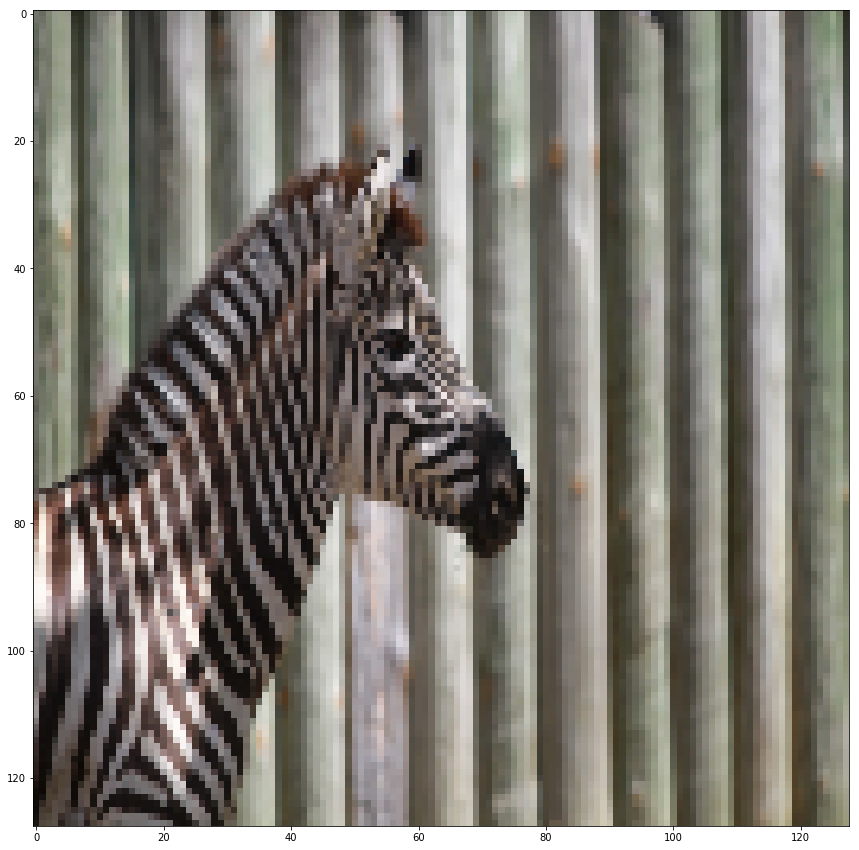

In [5]:
filename = "images/Fourier/zebra-wall.png"
im = io.imread(filename)
im = (im/255).astype(float) #To be sure is always between 0 and 1 after this cell


print(im.shape)
print(im.min(),im.max())


#Resize small first to debug
h = 128
w = 128

im = resize(im,(h,w),mode='constant') #This function will put the intensitites between 0 and 1 -> multiply by 255 when needed

print(im.shape)
print(im.min(),im.max())
plt.imshow(im)

In [6]:
# rewrite the above code to a function, casue I prefer to use function or class in the project.
# It will make debug easier and the structure clearer. Class is a little overshot here.
def image_load(filename, h=128, w=128):
    im = io.imread(filename)
    im = (im/255).astype(float) #To be sure is always between 0 and 1
    #Args: h,w : resize small first to debug, default:128, 128
    im = resize(im,(h,w),mode='constant') #This function will put the intensitites between 0 and 1 -> multiply by 255 when needed
    
    return im


In [7]:
#ATTENTION The quatization table assumes the original image intensities before the dct are between 0 and 255


from scipy import fftpack

def dct_2d(im):
    return fftpack.dct(fftpack.dct(im.T, norm='ortho').T, norm='ortho')

def idct_2d(im):
    return fftpack.idct(fftpack.idct(im.T, norm='ortho').T, norm='ortho')

def quantization_table(component='lum'):
    # Quantization Table for: Photoshop 
    # (http://www.impulseadventure.com/photo/jpeg-quantization.html)
    if component == 'lum':
        q = np.array([[2, 2, 2, 2, 3, 4, 5, 6],
                      [2, 2, 2, 2, 3, 4, 5, 6],
                      [2, 2, 2, 2, 4, 5, 7, 9],
                      [2, 2, 2, 4, 5, 7, 9, 12],
                      [3, 3, 4, 5, 8, 10, 12, 12],
                      [4, 4, 5, 7, 10, 12, 12, 12],
                      [5, 5, 7, 9, 12, 12, 12, 12],
                      [6, 6, 9, 12, 12, 12, 12, 12]])
    elif component == 'chrom':
        q = np.array([[3, 3, 5, 9, 13, 15, 15, 15],
                      [3, 4, 6, 11, 14, 12, 12, 12],
                      [5, 6, 9, 14, 12, 12, 12, 12],
                      [9, 11, 14, 12, 12, 12, 12, 12],
                      [13, 14, 12, 12, 12, 12, 12, 12],
                      [15, 12, 12, 12, 12, 12, 12, 12],
                      [15, 12, 12, 12, 12, 12, 12, 12],
                      [15, 12, 12, 12, 12, 12, 12, 12]])
    else:
        raise ValueError((
            "component should be either 'lum' or 'chrom', "
            "but '{comp}' was found").format(comp=component))

    return q



In [8]:
def RGB2YIQ(im):
    # Convert images from RGB to YIQ color space
    
    trans_matrix = np.array([[0.299, 0.587, 0.114],
                   [0.5959, -0.2746, -0.3213],
                   [0.2115, -0.5227, 0.3112]]) # define the transform matrix from RGB to YIQ based on https://en.wikipedia.org/wiki/YIQ
    image_YIQ = np.dot(im, trans_matrix.T)
    # based on wiki, actually it is trans*image. 
    # but when I try this it shows error: shapes not aligned
    # so I use image*trans.T it's the transposed transformation matrix
    # I got this from a built-in function skimage.color.rgb2yiq REF: https://stackoverflow.com/questions/46990838/numpy-transforming-rgb-image-to-yiq-color-space
    return image_YIQ




def YIQ2RGB(im):
    # Convert images from YIQ to RGB color space
    
    trans_matrix = np.array([[1, 0.956, 0.619],
                   [1, -0.272, -0.647],
                   [1, -1.106, 1.703]]) # define the transform matrix from YIQ to RGB based on https://en.wikipedia.org/wiki/YIQ
    image_RGB = np.dot(im, trans_matrix.T)
    # based on wiki, actually it is trans*image. 
    # but when I try this it shows error: shapes not aligned
    # so I use image*trans.T it's the transposed transformation matrix
    # I got this from a built-in function skimage.color.rgb2yiq REF: https://stackoverflow.com/questions/46990838/numpy-transforming-rgb-image-to-yiq-color-space
    return image_RGB

In [9]:
def reduceIQ(im_YIQ):
    # reduce the size(to half) of I and Q channels
    
    a, b, c = np.shape(im_YIQ)
    Y = im_YIQ[:, :, 0]
    I = resize(im_YIQ[:, :, 1], (a/2, b/2))
    Q = resize(im_YIQ[:, :, 2], (a/2, b/2))
    
    return Y, I ,Q


def I_reduceIQ(Y, I, Q):
    (a,b) = np.shape(I)
    print(a,b)
    I = resize(I, (2*a, 2*b))
    Q = resize(Q, (2*a, 2*b))
    im = np.zeros((2*a,2*b,3))
    im[:, :, 0] = Y
    im[:, :, 1] = I
    im[:, :, 2] = Q
    return im

In [10]:
def subdivide_88(channel):
    # subdivide in 8x8 subblocks
    
    (a, b) = np.shape(channel)
    num = (a/8)*(b/8)
    subblcoks = np.zeros((int(num), 8, 8))
    
    channel_v = np.vsplit(channel, a/8) # split it following the row
    for i in range(np.shape(channel_v)[0]):
        channel_h = np.hsplit(channel_v[i], b/8) # split it following the column
        subblcoks[int(i*b/8):int((i+1)*b/8)] = channel_h
    return subblcoks
            
def I_subdivide(subblocks):
    # inverse subdivide
    (a, b, c) = np.shape(subblocks)
    x = int(np.sqrt(a))
    channel = np.zeros(((int(x*b), int(x*c))))
    for i in range(x):
        for j in range(x):
            channel[i*b:(i+1)*b,j*c:(j+1)*c] = subblocks[i*x+j]
    return channel

In [11]:
def subblocks_dct(subblocks):
    # A frequency transformation is computed for each block
    
    dct_subblocks = subblocks.copy()
    for i in range(np.shape(subblocks)[0]):
        dct_subblocks[i] = dct_2d(subblocks[i])
    return dct_subblocks

def I_dct(subblocks):
    # Inverse DCT
    I_dct_subblocks = subblocks.copy()
    for i in range(np.shape(subblocks)[0]):
        I_dct_subblocks[i] = idct_2d(subblocks[i])
    return I_dct_subblocks

In [12]:
def quantization(subblocks, type='lum'):
    # quantization
    quan = subblocks/quantization_table(component = type) # if round here, u can't recontruct it
    return quan


def I_quantization(subblocks, type='lum'):
    # inverse quantization
    quan = subblocks*quantization_table(component = type)
    return quan

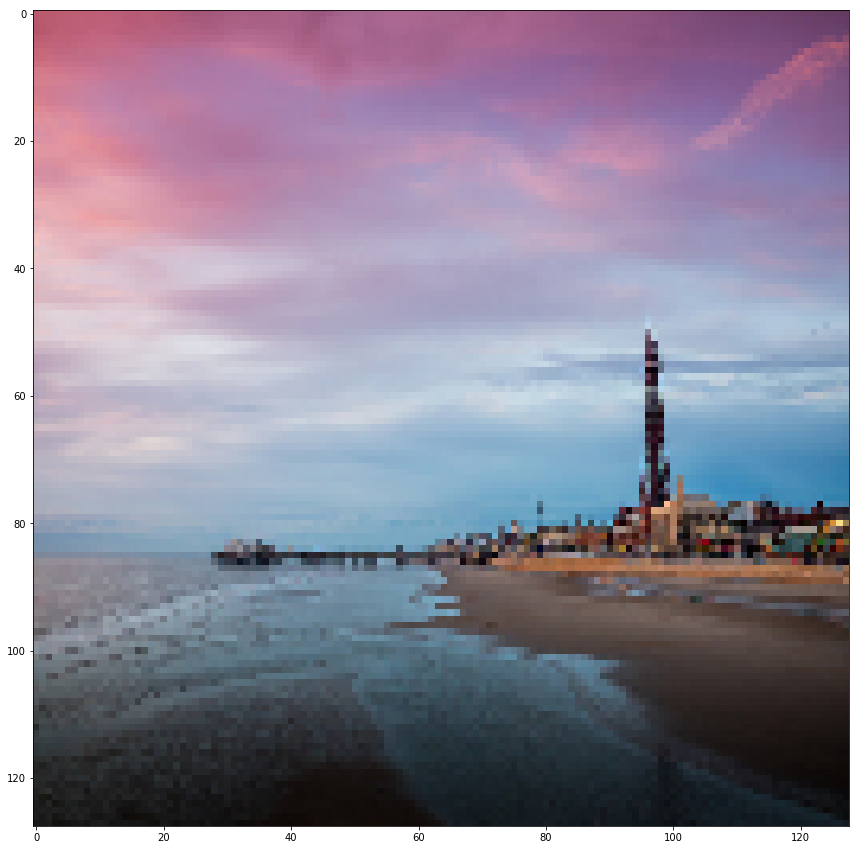

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


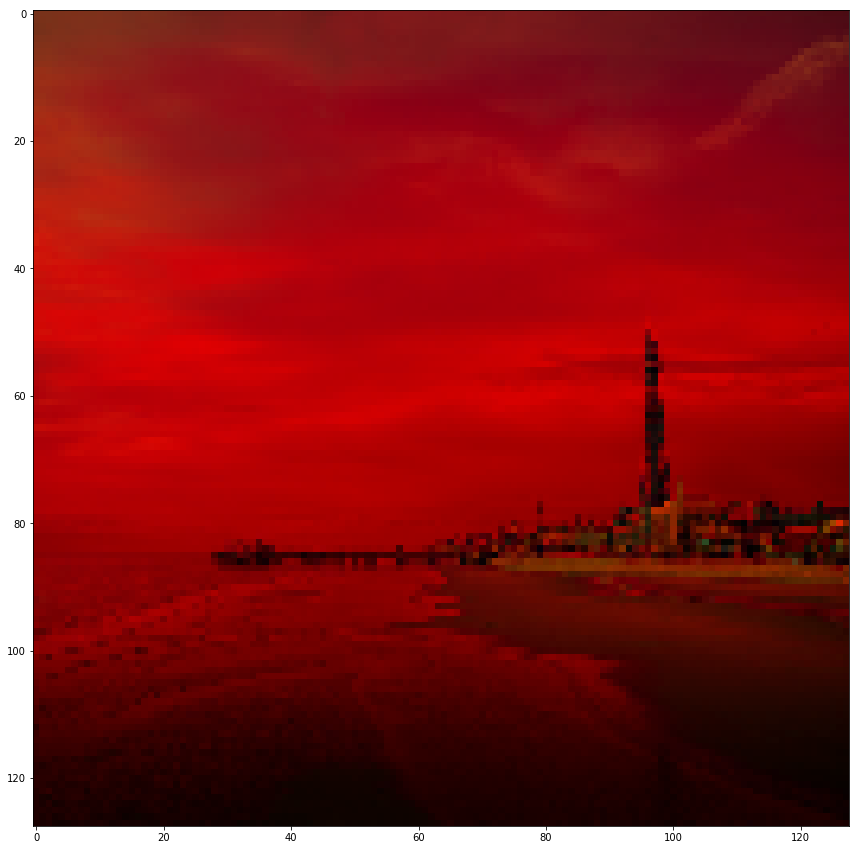

E:\ananconda\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


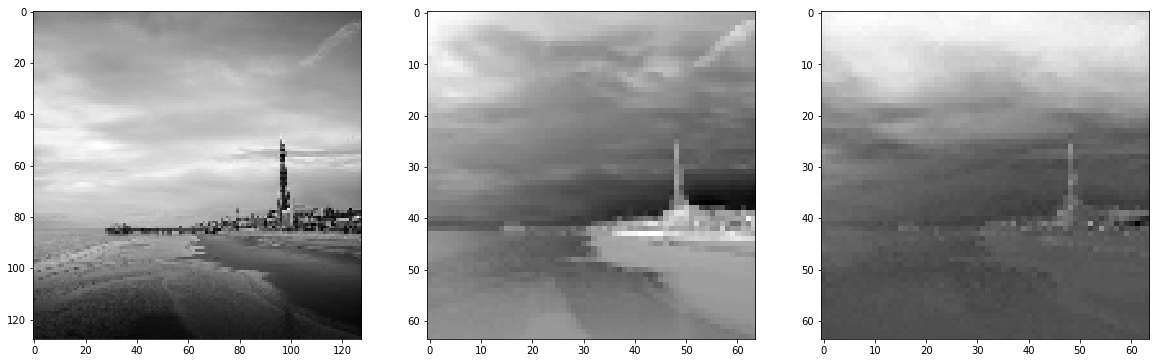

(128, 128) (64, 64) (64, 64)
[[[0.46609007 0.47719608 0.47719608 ... 0.48659203 0.49164184 0.49140772]
  [0.46737684 0.47832549 0.47719608 ... 0.49027489 0.49741961 0.49769804]
  [0.45916483 0.46699427 0.48238664 ... 0.4856549  0.4941261  0.49859216]
  ...
  [0.50404963 0.50923683 0.51256097 ... 0.50922001 0.5182815  0.52395159]
  [0.51898664 0.52538431 0.52610429 ... 0.5229239  0.52467451 0.53178768]
  [0.53003137 0.53526483 0.54150018 ... 0.53948051 0.53801207 0.53847659]]

 [[0.4898549  0.4898549  0.49532929 ... 0.48720772 0.47798039 0.47405882]
  [0.49664669 0.49547414 0.50042796 ... 0.49323226 0.4799565  0.47798039]
  [0.4976074  0.49430699 0.49894179 ... 0.49870579 0.49241054 0.48911703]
  ...
  [0.52772279 0.52832022 0.5333712  ... 0.5326847  0.5276994  0.52861434]
  [0.53330204 0.53722361 0.54024651 ... 0.54024651 0.541783   0.54202929]
  [0.53909228 0.53922606 0.54008235 ... 0.53935748 0.54480873 0.54380784]]

 [[0.47793725 0.48643909 0.48185882 ... 0.4667451  0.4625451  0.451

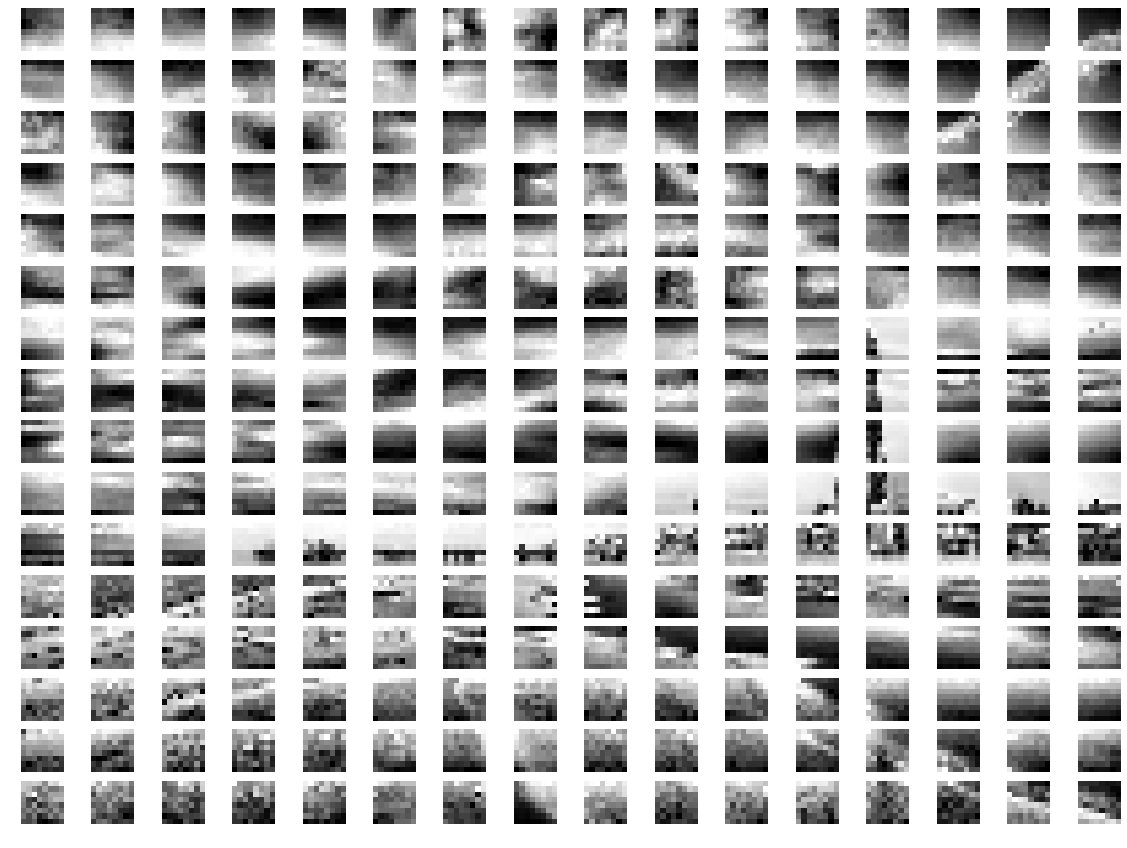

[[[ 4.00587612e+00 -5.48102607e-02 -7.93980384e-03 ... -3.26057503e-03
   -2.89823567e-03  1.80090672e-04]
  [-1.52489714e-01 -2.37270676e-02 -3.95122882e-03 ... -1.06547077e-03
   -4.43650321e-03  8.68710954e-04]
  [ 5.26893924e-02  1.46686960e-02  7.48966168e-03 ... -2.10160453e-03
    8.02691093e-04  4.27120924e-04]
  ...
  [-1.83581467e-02  4.05970252e-04 -2.72552939e-03 ... -1.50367966e-03
    8.72612354e-04 -2.76693887e-05]
  [ 9.31795704e-04 -1.09756762e-03 -1.69192824e-03 ...  3.72564920e-04
    1.41867931e-03  6.09013949e-03]
  [ 2.59778680e-03  1.31226113e-03  5.07718319e-03 ...  2.57669103e-03
    3.80006598e-03 -1.08180647e-03]]

 [[ 4.10692675e+00  1.89303985e-02 -1.87817452e-02 ...  6.33098136e-05
    1.17517097e-03  1.01694930e-03]
  [-1.63287295e-01  2.18684404e-02 -8.48382858e-03 ... -3.36037532e-05
    5.31412710e-03 -5.38790118e-04]
  [ 1.27356835e-02 -5.71993753e-03  1.60145108e-03 ...  1.76503940e-03
    4.05778233e-03 -2.44352130e-04]
  ...
  [-6.94572323e-03 -1.9

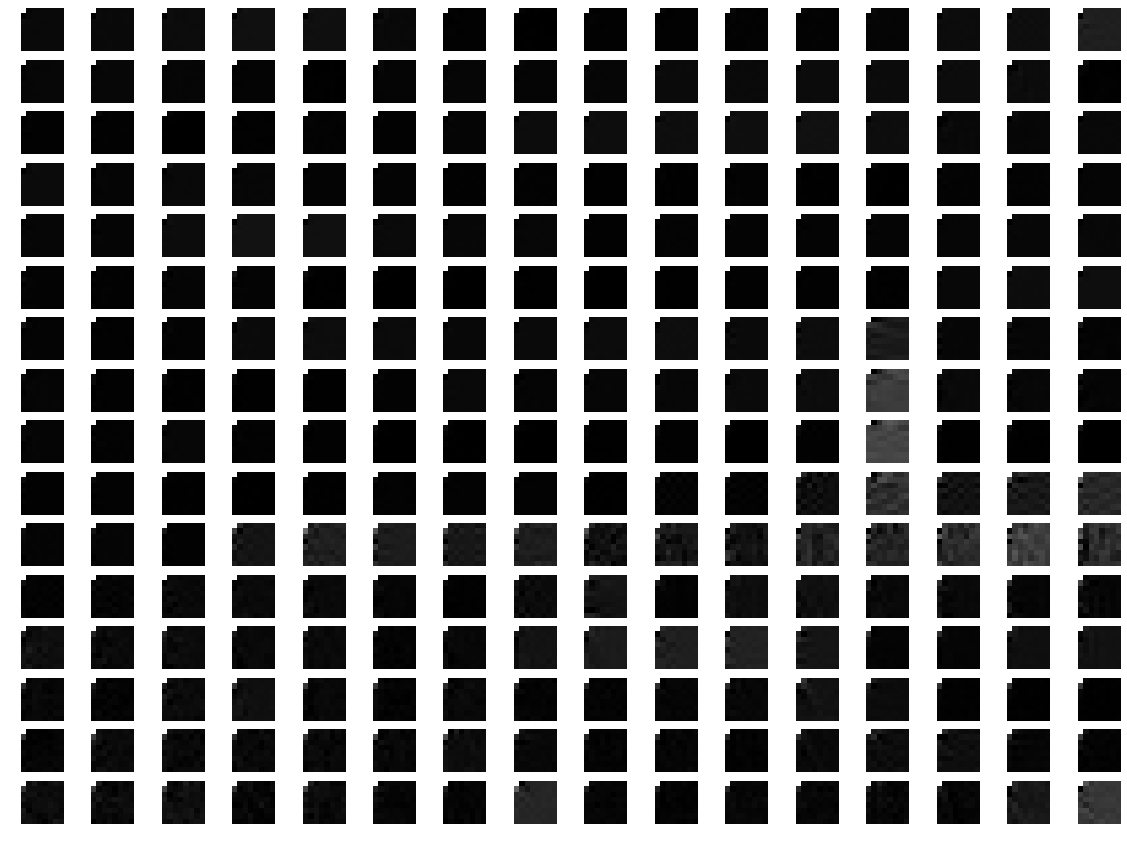

[[[ 2.00293806e+00 -2.74051304e-02 -3.96990192e-03 ... -8.15143757e-04
   -5.79647135e-04  3.00151119e-05]
  [-7.62448572e-02 -1.18635338e-02 -1.97561441e-03 ... -2.66367694e-04
   -8.87300642e-04  1.44785159e-04]
  [ 2.63446962e-02  7.33434800e-03  3.74483084e-03 ... -4.20320907e-04
    1.14670156e-04  4.74578805e-05]
  ...
  [-4.58953668e-03  1.01492563e-04 -5.45105878e-04 ... -1.25306638e-04
    7.27176962e-05 -2.30578239e-06]
  [ 1.86359141e-04 -2.19513523e-04 -2.41704034e-04 ...  3.10470766e-05
    1.18223276e-04  5.07511624e-04]
  [ 4.32964466e-04  2.18710188e-04  5.64131466e-04 ...  2.14724253e-04
    3.16672165e-04 -9.01505394e-05]]

 [[ 2.05346338e+00  9.46519925e-03 -9.39087261e-03 ...  1.58274534e-05
    2.35034193e-04  1.69491550e-04]
  [-8.16436475e-02  1.09342202e-02 -4.24191429e-03 ... -8.40093829e-06
    1.06282542e-03 -8.97983530e-05]
  [ 6.36784177e-03 -2.85996877e-03  8.00725538e-04 ...  3.53007880e-04
    5.79683189e-04 -2.71502367e-05]
  ...
  [-1.73643081e-03 -4.7

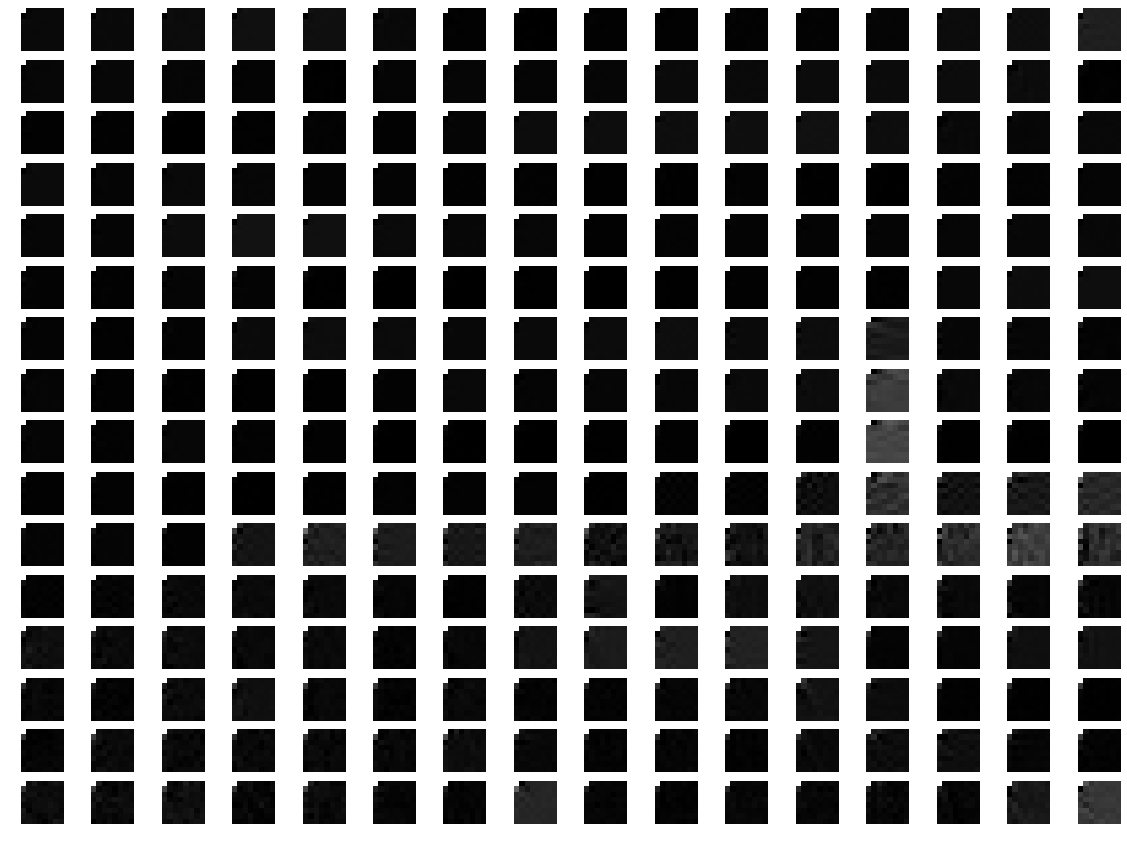

[[[0.46609007 0.47719608 0.47719608 ... 0.48659203 0.49164184 0.49140772]
  [0.46737684 0.47832549 0.47719608 ... 0.49027489 0.49741961 0.49769804]
  [0.45916483 0.46699427 0.48238664 ... 0.4856549  0.4941261  0.49859216]
  ...
  [0.50404963 0.50923683 0.51256097 ... 0.50922001 0.5182815  0.52395159]
  [0.51898664 0.52538431 0.52610429 ... 0.5229239  0.52467451 0.53178768]
  [0.53003137 0.53526483 0.54150018 ... 0.53948051 0.53801207 0.53847659]]

 [[0.4898549  0.4898549  0.49532929 ... 0.48720772 0.47798039 0.47405882]
  [0.49664669 0.49547414 0.50042796 ... 0.49323226 0.4799565  0.47798039]
  [0.4976074  0.49430699 0.49894179 ... 0.49870579 0.49241054 0.48911703]
  ...
  [0.52772279 0.52832022 0.5333712  ... 0.5326847  0.5276994  0.52861434]
  [0.53330204 0.53722361 0.54024651 ... 0.54024651 0.541783   0.54202929]
  [0.53909228 0.53922606 0.54008235 ... 0.53935748 0.54480873 0.54380784]]

 [[0.47793725 0.48643909 0.48185882 ... 0.4667451  0.4625451  0.45111752]
  [0.48275294 0.489423

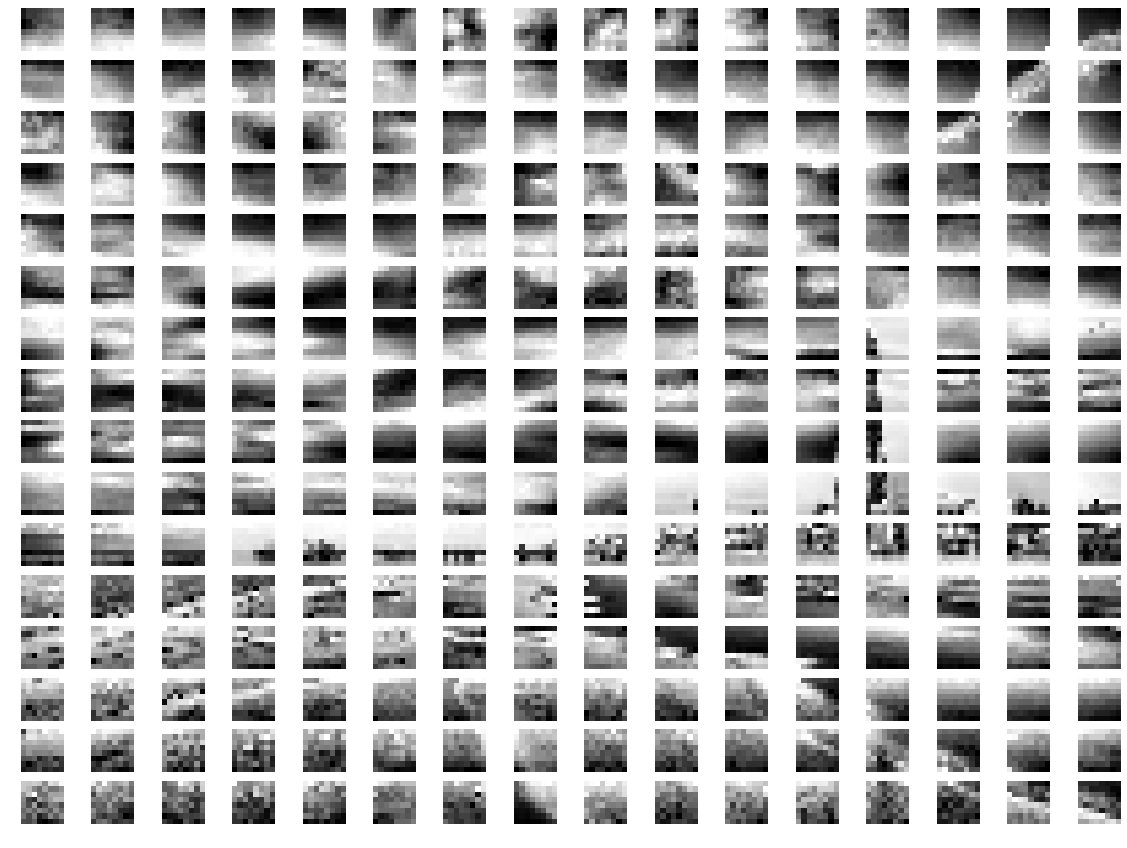

[[0.46609007 0.47719608 0.47719608 ... 0.30331752 0.30265882 0.29547439]
 [0.46737684 0.47832549 0.47719608 ... 0.31107022 0.30773035 0.30380878]
 [0.45916483 0.46699427 0.48238664 ... 0.31783137 0.3137151  0.30912924]
 ...
 [0.11388866 0.12615472 0.1103151  ... 0.06097377 0.06182878 0.05159608]
 [0.11956189 0.09967831 0.12500319 ... 0.09158097 0.06632794 0.0469207 ]
 [0.10130208 0.09869792 0.11019657 ... 0.11257266 0.11721998 0.10106299]]
(128, 128)


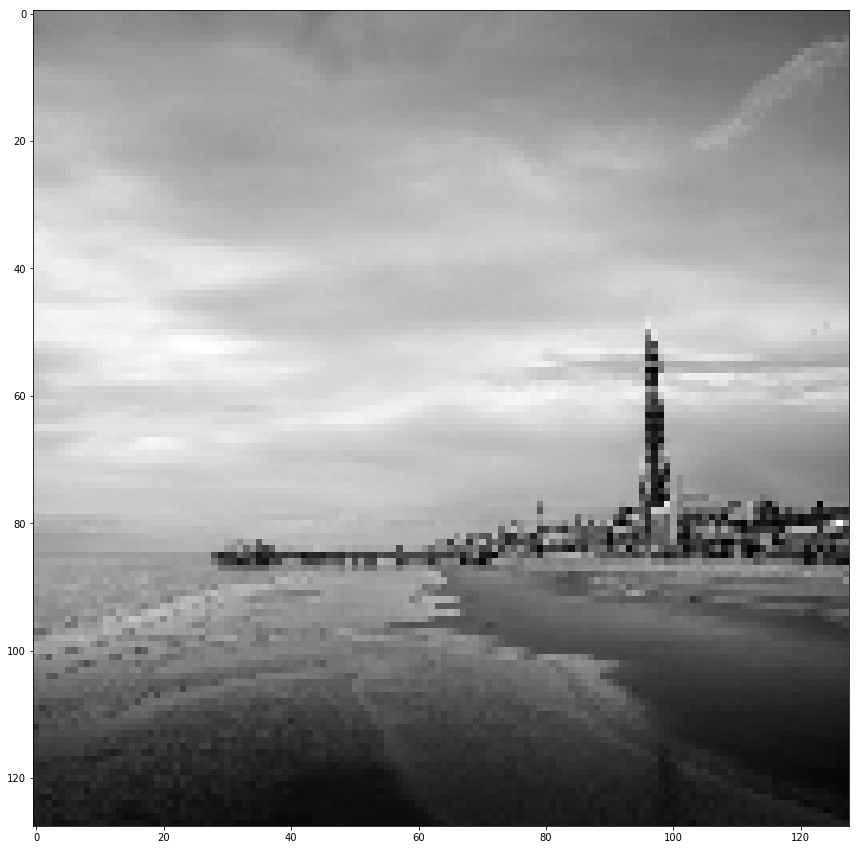

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


64 64
[[[ 4.66090074e-01  1.10221048e-01  5.76462132e-02]
  [ 4.77196078e-01  1.46863113e-01  7.69568118e-02]
  [ 4.77196078e-01  1.46666546e-01  7.71472001e-02]
  ...
  [ 3.03317525e-01  3.48642665e-02  6.01770943e-02]
  [ 3.02658824e-01  3.49777185e-02  6.04500352e-02]
  [ 2.95474387e-01  2.62758334e-02  4.54398792e-02]]

 [[ 4.67376838e-01  1.46469077e-01  7.65705437e-02]
  [ 4.78325490e-01  1.95147970e-01  1.02311811e-01]
  [ 4.77196078e-01  1.94859706e-01  1.02747315e-01]
  ...
  [ 3.11070221e-01  4.56722371e-02  8.16973510e-02]
  [ 3.07730346e-01  4.57317406e-02  8.18114991e-02]
  [ 3.03808778e-01  3.43211192e-02  6.14014299e-02]]

 [[ 4.59164828e-01  1.45484436e-01  7.59883959e-02]
  [ 4.66994271e-01  1.93808942e-01  1.01717267e-01]
  [ 4.82386642e-01  1.93468329e-01  1.02516078e-01]
  ...
  [ 3.17831373e-01  4.40453339e-02  8.46198014e-02]
  [ 3.13715104e-01  4.39213057e-02  8.42344035e-02]
  [ 3.09129243e-01  3.28944687e-02  6.30312784e-02]]

 ...

 [[ 1.13888664e-01 -6.421569

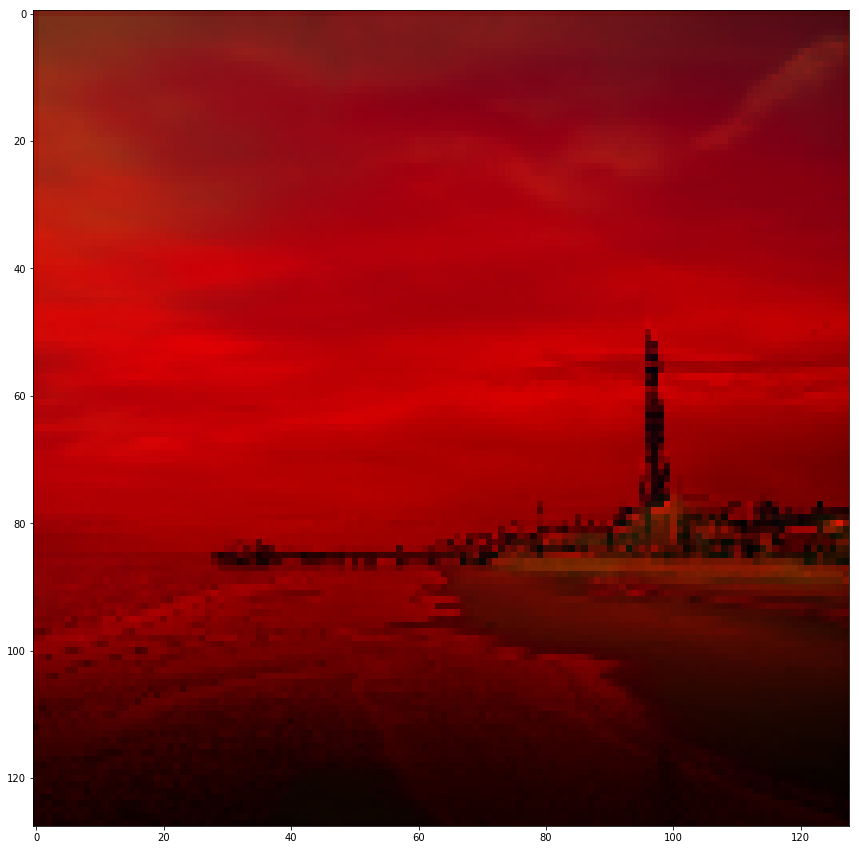

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[0.6071444  0.39881285 0.4423571 ]
  [0.66523348 0.38745825 0.44582293]
  [0.66516341 0.38738854 0.44636456]
  ...
  [0.37389738 0.25489986 0.36723924]
  [0.37351609 0.25403371 0.36691988]
  [0.34872137 0.25892776 0.34379743]]

 [[0.65479844 0.37799611 0.43578168]
  [0.72821796 0.3590495  0.43672885]
  [0.72708255 0.35771673 0.43665992]
  ...
  [0.40530354 0.24578919 0.39968732]
  [0.40209121 0.24235927 0.39647602]
  [0.37462725 0.25474671 0.37041625]]

 [[0.64528477 0.37042857 0.42766728]
  [0.71523861 0.34846717 0.42586609]
  [0.73079982 0.36343535 0.44299555]
  ...
  [0.41231837 0.25110203 0.41322476]
  [0.40784497 0.24726885 0.40858933]
  [0.37959272 0.25940071 0.38009023]]

 ...

 [[0.11272485 0.11463811 0.11308598]
  [0.12431262 0.12736287 0.12477167]
  [0.10789231 0.11194101 0.10830646]
  ...
  [0.05316985 0.06207436 0.07575495]
  [0.05477692 0.06264348 0.07610933]
  [0.0465892  0.05209989 0.06211875]]

 [[0.11917395 0.1198117  0.11929432]
  [0.0992621  0.10019584 0.09810941]


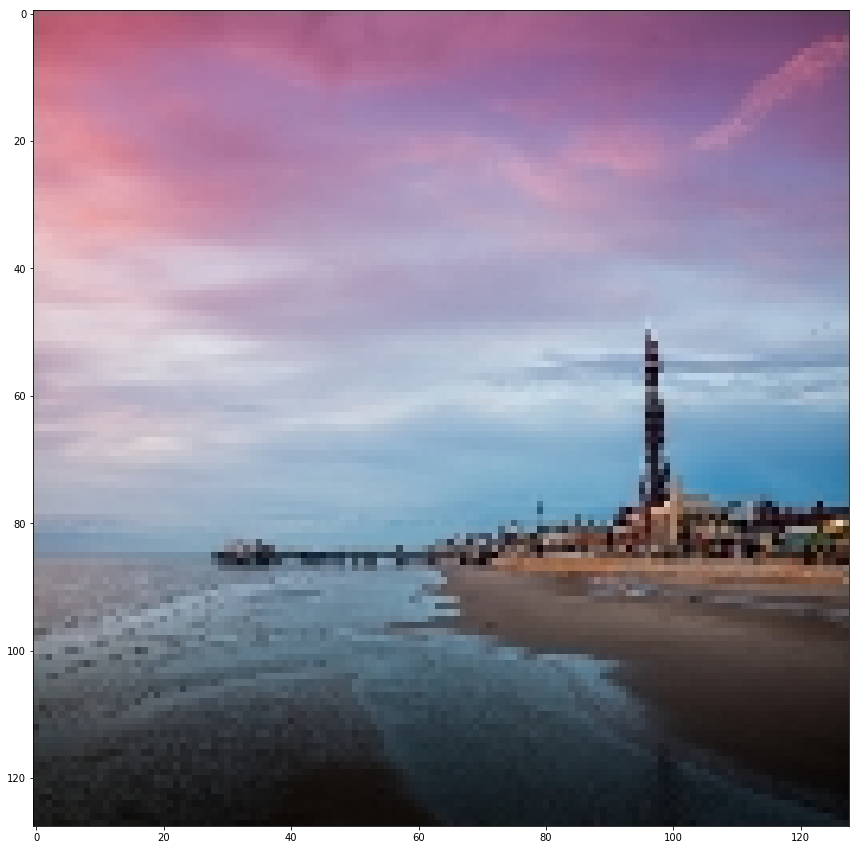

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
import skimage
from skimage.transform import resize # Resize image to match a certain size
# import the python package this project need



if __name__=="__main__":
    # main funcion (try to be more professional ahah)
    # well although in jupyter it doesn't work. you still have to run the above cells first!
    filename = "images/jpeg/pink.jpg"
    # you can just change here for test
    
    image = image_load(filename) # load the image
    
    plt.imshow(image) # show the result
    plt.show()
    
    image_YIQ = RGB2YIQ(image) # transform RGB to YIQ
    
    plt.imshow(image_YIQ) # show the result
    plt.show()
    
    Y, I, Q = reduceIQ(image_YIQ) # Reducue the I and Q channel 
    
    
    
    plt.subplot(1,3,1) # show the result
    plt.imshow(Y)
    plt.subplot(1,3,2)
    plt.imshow(I)
    plt.subplot(1,3,3)
    plt.imshow(Q)
    plt.show()
    print(np.shape(Y), np.shape(I), np.shape(Q))
    
    Y_sub = subdivide_88(Y) # subdivide each channel
    I_sub = subdivide_88(I)
    Q_sub = subdivide_88(Q)
    
    print(Y_sub) # show the result
    print(np.shape(Y_sub)) 
    print(np.shape(I_sub))
    for i in range(np.shape(Y_sub)[0]):
        plt.subplot(16,16,i+1)
        plt.imshow(Y_sub[i])
        plt.axis('off')
    plt.show()
    
    Y_sub_dct = subblocks_dct(Y_sub) # Compute with a discrete cosine transform
    I_sub_dct = subblocks_dct(I_sub)
    Q_sub_dct = subblocks_dct(Q_sub)
    
    print(Y_sub_dct) # show the result
    print(np.shape(Y_sub_dct)) 
    print(np.shape(I_sub_dct))
    for i in range(np.shape(Y_sub_dct)[0]):
        plt.subplot(16,16,i+1)
        plt.imshow(Y_sub_dct[i])
        plt.axis('off')
    plt.show()
    
    Y_sub_dct_qua = quantization(Y_sub_dct) # Quantization and round
    I_sub_dct_qua = quantization(I_sub_dct,type='chrom')
    Q_sub_dct_qua = quantization(Q_sub_dct,type='chrom')
    
    print(Y_sub_dct_qua) # show the result
    print(np.shape(Y_sub_dct_qua))
    
    I_Y_sub_dct = I_quantization(Y_sub_dct_qua) # Inverse quanitzation
    I_I_sub_dct = I_quantization(I_sub_dct_qua,type='chrom')
    I_Q_sub_dct = I_quantization(Q_sub_dct_qua,type='chrom')
    
    print(I_Y_sub_dct) # show the result
    print(np.shape(I_Y_sub_dct)) 
    print(np.shape(I_I_sub_dct))
    for i in range(np.shape(I_Y_sub_dct)[0]):
        plt.subplot(16,16,i+1)
        plt.imshow(I_Y_sub_dct[i])
        plt.axis('off')
    plt.show()
        
    I_Y_sub = I_dct(I_Y_sub_dct) # Inverse the DCT
    I_I_sub = I_dct(I_I_sub_dct)
    I_Q_sub = I_dct(I_Q_sub_dct)
    
    print(I_Y_sub) # show the result
    print(np.shape(I_Y_sub)) 
    print(np.shape(I_I_sub))
    for i in range(np.shape(I_Y_sub)[0]):
        plt.subplot(16,16,i+1)
        plt.imshow(I_Y_sub[i])
        plt.axis('off')
    plt.show()
    
    
    I_Y = I_subdivide(I_Y_sub) # Inverse the subdivide
    I_I = I_subdivide(I_I_sub)
    I_Q = I_subdivide(I_Q_sub)
    
    print(I_Y) # show the result
    print(np.shape(I_Y))
    plt.imshow(I_Y)
    plt.show()
    
    
    I_im = I_reduceIQ(I_Y, I_I, I_Q) # Inverse the reduce
    
    print(I_im) # show the result
    plt.imshow(I_im)
    plt.show()
    
    
    
    I_im_rgb = YIQ2RGB(I_im) # transform form YIQ to RGB
    
    print(I_im_rgb) # show the result
    plt.imshow(I_im_rgb)
    plt.show()
    
    
    
    
    
    
    
    
    
    
    
    

In [15]:
def jpegCompress(filename):
    # A global function of compress
    im = image_load(filename)
    
    im_yiq = RGB2YIQ(im)
    
    Y,I,Q = reduceIQ(im_yiq)
    
    Y_sub = subdivide_88(Y)
    I_sub = subdivide_88(I)
    Q_sub = subdivide_88(Q)
    
    Y_sub_dct = subblocks_dct(Y_sub)
    I_sub_dct = subblocks_dct(I_sub)
    Q_sub_dct = subblocks_dct(Q_sub)
    
    Y_compress = quantization(Y_sub_dct)
    I_compress = quantization(I_sub_dct,type='chrom')
    Q_compress = quantization(Q_sub_dct,type='chrom')
    
    return Y_compress, I_compress, Q_compress


def jpegDecompress(Y_compress, I_compress, Q_compress):
    I_Y_sub_dct = I_quantization(Y_compress)
    I_I_sub_dct = I_quantization(I_compress,type='chrom')
    I_Q_sub_dct = I_quantization(Q_compress,type='chrom')
    
    I_Y_sub = I_dct(I_Y_sub_dct)
    I_I_sub = I_dct(I_I_sub_dct)
    I_Q_sub = I_dct(I_Q_sub_dct)
    
    I_Y = I_subdivide(I_Y_sub)
    I_I = I_subdivide(I_I_sub)
    I_Q = I_subdivide(I_Q_sub)
    
    I_im = I_reduceIQ(I_Y, I_I, I_Q)
    
    im = YIQ2RGB(I_im)
    
    return im

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


64 64


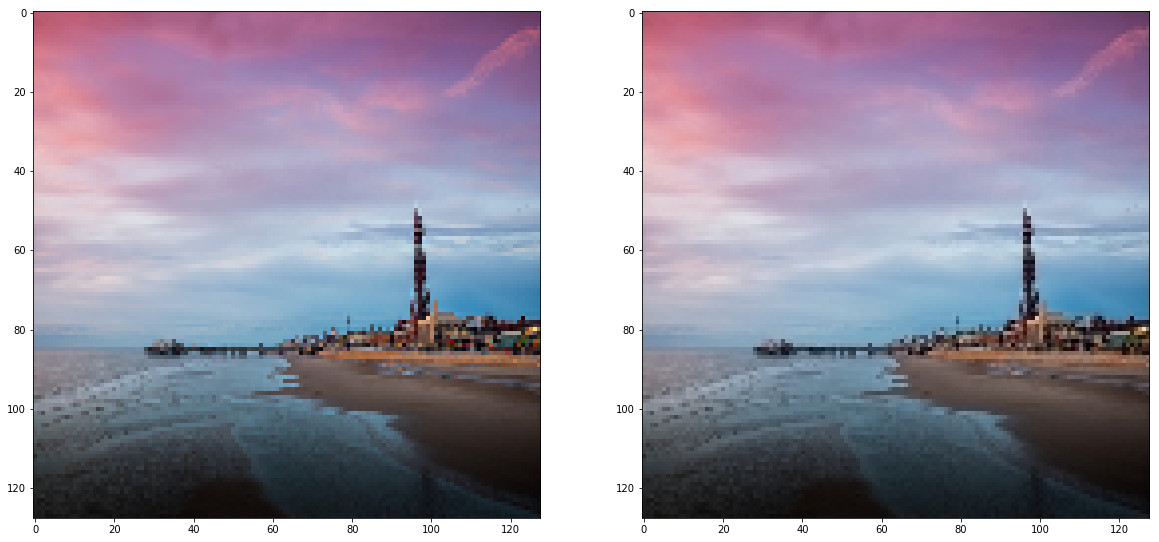

In [19]:
Y,I,Q = jpegCompress(filename)
image_compress = jpegDecompress(Y,I,Q)
image = image_load(filename)

plt.subplot(1, 2, 1) # show the result
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(image_compress)
